OLS test MSE: 7.59
Bayesian test MSE: 3.27


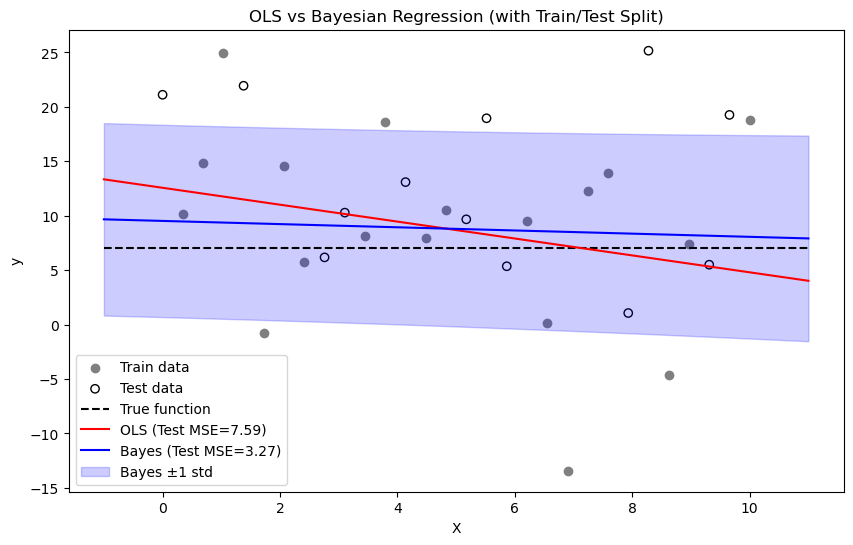

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import pandas as pd 

np.random.seed(0)

# 1. Generate data
n_samples = 30
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
y_true = X.ravel() - X.ravel() + 7
noise = np.random.normal(0, 8, size=n_samples)
y_noisy = y_true + noise

# 2. Train/test split
X_train, X_test, y_train, y_test, y_true_train, y_true_test = train_test_split(
    X, y_noisy, y_true, test_size=0.4, random_state=42
)

# 3. Fit models
ols = LinearRegression().fit(X_train, y_train)
bayes = BayesianRidge().fit(X_train, y_train)

# 4. Predict and get metrics
y_pred_ols = ols.predict(X_test)
y_pred_bayes, y_std_bayes = bayes.predict(X_test, return_std=True)

mse_ols = mean_squared_error(y_true_test, y_pred_ols)
mse_bayes = mean_squared_error(y_true_test, y_pred_bayes)

print(f"OLS test MSE: {mse_ols:.2f}")
print(f"Bayesian test MSE: {mse_bayes:.2f}")

# 5. Plot results
xx = np.linspace(X.min() - 1, X.max() + 1, 200).reshape(-1, 1)
yy_true = xx.ravel()-xx.ravel() + 7
yy_ols = ols.predict(xx)
yy_bayes, yy_bayes_std = bayes.predict(xx, return_std=True)

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='gray', label='Train data')
plt.scatter(X_test, y_test, facecolors='none', edgecolors='black', label='Test data')
plt.plot(xx, yy_true, 'k--', label='True function')
plt.plot(xx, yy_ols, 'r-', label=f'OLS (Test MSE={mse_ols:.2f})')
plt.plot(xx, yy_bayes, 'b-', label=f'Bayes (Test MSE={mse_bayes:.2f})')
plt.fill_between(xx.ravel(), yy_bayes - yy_bayes_std, yy_bayes + yy_bayes_std,
                 alpha=0.2, color='blue', label='Bayes ±1 std')
plt.legend()
plt.title("OLS vs Bayesian Regression (with Train/Test Split)")
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(0)

# Problem setup
n_samples = 80
p = 100
n_nonzero = 5

beta = np.zeros(p)
nonzero_idx = np.random.choice(p, n_nonzero, replace=False)
beta[nonzero_idx] = np.random.normal(0, 5, size=n_nonzero)

X = np.random.normal(size=(n_samples, p))
noise = np.random.normal(0, 2.0, size=n_samples)
y = X.dot(beta) + noise

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit models
ols = LinearRegression().fit(X_train, y_train)
bayes = BayesianRidge().fit(X_train, y_train)

# Predict
y_pred_ols = ols.predict(X_test)
y_pred_bayes = bayes.predict(X_test)

# Evaluate
mse_ols = mean_squared_error(y_test, y_pred_ols)
mse_bayes = mean_squared_error(y_test, y_pred_bayes)

print(f"True nonzero indices: {sorted(nonzero_idx.tolist())}")
print(f"OLS Test MSE: {mse_ols:.2f}")
print(f"Bayesian Test MSE: {mse_bayes:.2f}")
print(f"OLS Coef Norm: {np.linalg.norm(ols.coef_):.2f}")
print(f"Bayes Coef Norm: {np.linalg.norm(bayes.coef_):.2f}")


True nonzero indices: [2, 26, 55, 75, 86]
OLS Test MSE: 27.98
Bayesian Test MSE: 37.57
OLS Coef Norm: 5.92
Bayes Coef Norm: 3.79


    tau2  lambda = sigma2/tau2  beta_hat_OLS  beta_hat_Bayes  \
0    inf              0.000000      2.181034        2.181034   
1  100.0              0.008682      2.181034        2.180697   
2   10.0              0.086825      2.181034        2.177676   
3    5.0              0.173650      2.181034        2.174328   
4    2.0              0.434124      2.181034        2.164347   
5    1.0              0.868248      2.181034        2.147913   
6    0.5              1.736495      2.181034        2.115784   
7    0.2              4.341239      2.181034        2.024915   
8    0.1              8.682477      2.181034        1.889653   
9   0.05             17.364954      2.181034        1.666953   

   retained_fraction (Bayes/OLS)  
0                       1.000000  
1                       0.999846  
2                       0.998460  
3                       0.996926  
4                       0.992349  
5                       0.984814  
6                       0.970083  
7              

/var/folders/f_/v9bfd88j177cy_hgl66y3bp80000gp/T/ipykernel_69933/1893992051.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  XtX = float(X_centered.T @ X_centered)
/var/folders/f_/v9bfd88j177cy_hgl66y3bp80000gp/T/ipykernel_69933/1893992051.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Xty = float(X_centered.T @ y.reshape(-1, 1))


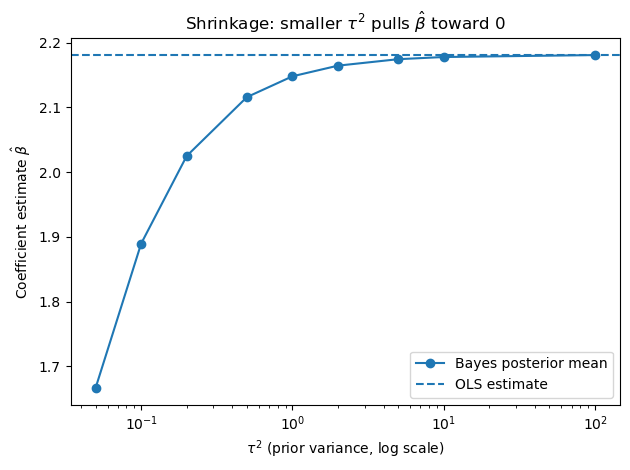

In [8]:
#Generate synthetic data
rng = np.random.default_rng(7)
n = 20
X = rng.uniform(-3, 3, size=(n, 1))
beta_true = 2.0
sigma_true = 1.0
eps = rng.normal(0, sigma_true, size=n)
y = beta_true * X[:, 0] + eps

#Center X
X_centered = X - X.mean(axis=0, keepdims=True)

#OLS estimate
XtX = float(X_centered.T @ X_centered)
Xty = float(X_centered.T @ y.reshape(-1, 1))
beta_ols = Xty / XtX

#Estimate residual variance
resid = y - (X_centered[:, 0] * beta_ols)
sigma2_hat = float((resid @ resid) / (n - 1))

#Bayesian posterior mean for a grid of τ² 
tau2_grid = np.array([np.inf, 100.0, 10.0, 5.0, 2.0, 1.0, 0.5, 0.2, 0.1, 0.05])

rows = []
for tau2 in tau2_grid:
    if math.isinf(tau2):
        lam = 0.0
    else:
        lam = sigma2_hat / tau2
    beta_bayes = Xty / (XtX + lam)
    shrinkage_factor = beta_bayes / beta_ols
    rows.append({
        "tau2": ("inf" if math.isinf(tau2) else tau2),
        "lambda = sigma2/tau2": lam,
        "beta_hat_OLS": beta_ols,
        "beta_hat_Bayes": beta_bayes,
        "retained_fraction (Bayes/OLS)": shrinkage_factor
    })

df = pd.DataFrame(rows)
print(df)

#Plot shrinkage
finite_mask = [not (isinstance(t, str) or math.isinf(t)) for t in df["tau2"]]
tau2_vals = np.array([t for t in df["tau2"] if not (isinstance(t, str))], dtype=float)
beta_vals = np.array([b for t, b in zip(df["tau2"], df["beta_hat_Bayes"]) if not (isinstance(t, str))], dtype=float)

plt.figure()
plt.plot(tau2_vals, beta_vals, marker='o', label="Bayes posterior mean")
plt.axhline(y=float(beta_ols), linestyle='--', label="OLS estimate")
plt.xscale('log')
plt.xlabel(r"$\tau^2$ (prior variance, log scale)")
plt.ylabel(r"Coefficient estimate $\hat{\beta}$")
plt.title(r"Shrinkage: smaller $\tau^2$ pulls $\hat{\beta}$ toward 0")
plt.legend()
plt.tight_layout()
plt.show()
